<h2> Problem Statement 1 </h2>
<br>
<h4> Apply K-Means Clustering technique of Machine Learning to solve the given problem. </h4>
<br>
<p> We have given a collection of 8 points. P1 = [0.1, 0.6]; P2 = [0.15, 0.71]; P3 = [0.08, 0.9]; P4 = [0.16, 0.85]; P5 = [0.2, 0.3]; P6 = [0.25, 0.5]; P7 = [0.24, 0.1]; P8 = [0.3, 0.2]. Perform the K-Means Clustering with initial centroids as m1 = P1 = Cluster#1 = C1 and m2 = P8 = cluster#2 = C2. </p>
<br>
<h3>K-Means Clustering Algorithm</h3>
<p>K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science. K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.<br><br>It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.<br><br>It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.<br><br>The k-means clustering
algorithm mainly performs two tasks:</p>
<ul>
    <li>Determines the best value for K center points or centroids by an iterative process.</li>
    <li>Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.</li>
</ul>
<br>
<p>The working of the K-Means algorithm is explained in the below steps:</p>
<ul>
    <li><b>Step-1:</b> Select the number K to decide the number of clusters.</li>
    <li><b>Step-2:</b> Select random K points or centroids. (It can be other from the input dataset).</li>
    <li><b>Step-3:</b> Assign each data point to their closest centroid, which will form the predefined K clusters.</li>
    <li><b>Step-4:</b> Calculate the variance and place a new centroid of each cluster.</li>
    <li><b>Step-5:</b> Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.</li>
    <li><b>Step-6:</b> If any reassignment occurs, then go to step-4 else go to FINISH.</li>
    <li><b>Step-7:</b> The model is ready.</li>
</ul>
<h4>Elbow Method</h4>
<br>
<p>The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. <b>WCSS</b> stands for <b>Within Cluster Sum of Squares</b>, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:</p>
<br>
<p>WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2</p>
<p>∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms.</p>
<br>
<p>To find the optimal value of clusters, the elbow method follows the below steps:</p>
<ul>
    <li>It executes the K-means clustering on a given dataset for different K values (ranges from 1-10).</li>
    <li>For each value of K, calculates the WCSS value.</li>
    <li>Plots a curve between calculated WCSS values and the number of clusters K.</li>
    <li>The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.</li>
</ul>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
X = [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]
X_df = np.array(X)

cen = np.array([[0.1, 0.6], [0.3, 0.2]])

In [4]:
model = KMeans(n_clusters=2, init=cen, random_state=0)
model.fit(X_df)

C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
       init=array([[0.1, 0.6],
       [0.3, 0.2]]), max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=0,
       tol=0.0001, verbose=0)

In [5]:
print("Labels: ", model.labels_)

Labels:  [0 0 0 0 1 0 1 1]


<h4> Questions </h4>
<h6> 1. Which cluster does P6 belongs to? </h6>

In [6]:
print("Point P6 belongs to cluster: ", model.predict([[0.25, 0.5]]))

Point P6 belongs to cluster:  [0]


<h6> 2. What is the population of cluster around m2? </h6>

In [7]:
print("Population around cluster m2: ", np.count_nonzero(model.labels_ == 1))

Population around cluster m2:  3


<h6> 3. What is updated value of m1 and m2? </h6>

In [8]:
print("Updated value of m1 and m2: ", model.cluster_centers_)

Updated value of m1 and m2:  [[0.148      0.712     ]
 [0.24666667 0.2       ]]


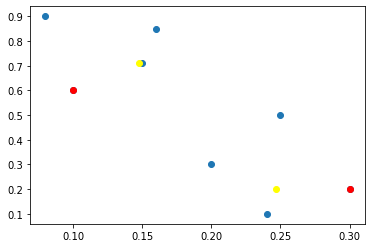

In [14]:
plt.scatter(X_df[:, 0], X_df[:, 1])
plt.scatter(cen[:, 0], cen[:, 1], color='red')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='yellow')

plt.show()

<h6> 4. What is the best value of K for the given problem? </h6>

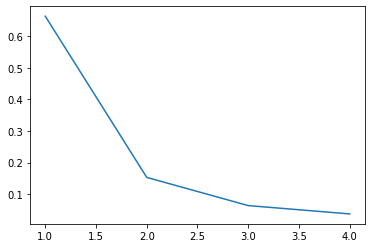

In [9]:
#elbow
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(X_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 5), wcss)
plt.show()

In [10]:
print("Best Value for k is 2")

Best Value for k is 2


<h2> Problem Statement 2 </h2>
<br>
<h4> Apply K-Means Clustering technique of Machine Learning to analyze the Iris dataset. Use Elbow method to find best value of K. </h4>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [12]:
irisData = datasets.load_iris()
X = irisData.data

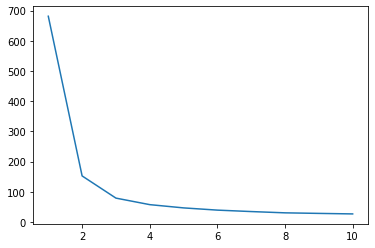

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
print("Labels:")
print(kmeans.labels_)
y_means = kmeans.predict(X)
print("Y Means:")
print(y_means)

Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Y Means:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


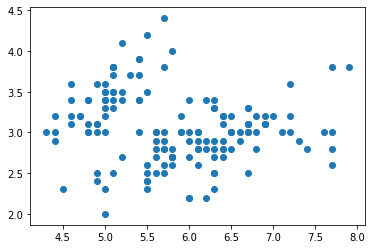

In [15]:
#Before Prediction
plt.scatter(X[:, 0], X[:, 1])
plt.x_label = "Sepal Length"
plt.y_label = "Sepal Width"
plt.show()

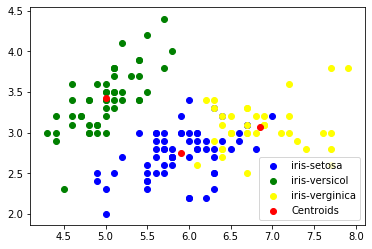

In [16]:
#After Prediction
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='blue', label='iris-setosa')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='green', label='iris-versicol')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='yellow', label='iris-verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', label='Centroids')
plt.legend()
plt.show()

<h2> Problem Statement 3 </h2>
<br>
<h4> Apply K-Means Clustering technique of Machine Learning to analyze the Bostan dataset. Use Elbow method to find best value of K. </h4>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [18]:
bostonData = datasets.load_boston()
boston = bostonData.data

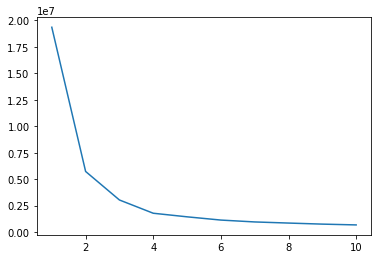

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(boston)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(boston)
print("Labels:")
print(kmeans.labels_)
y_means = kmeans.predict(boston)
print("Y Means:")
print(y_means)

Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

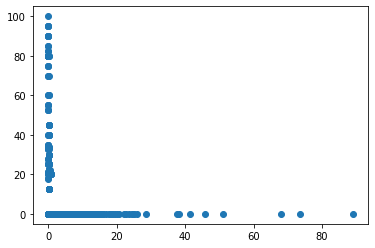

In [21]:
#Before Prediction
plt.scatter(boston[:, 0], boston[:, 1])
plt.show()

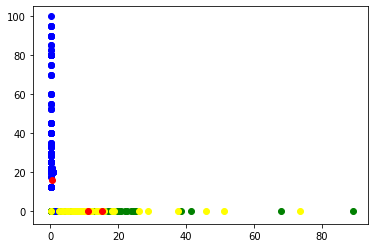

In [22]:
#After Prediction
plt.scatter(boston[y_means == 0, 0], boston[y_means == 0, 1], color = 'blue')
plt.scatter(boston[y_means == 1, 0], boston[y_means == 1, 1], color = 'green')
plt.scatter(boston[y_means == 2, 0], boston[y_means == 2, 1], color = 'yellow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')
plt.show()

<h2> Problem Statement 4 </h2>
<br>
<h4> Apply Linear Regression technique to solve the given problem. </h4>
<p> The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data. </p>
<br>
<h3>Linear Regression Algorithm</h3>
<p>Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables they are considering, and the number of independent variables getting used.</p>
<p>Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.</p>
<h3>Coefficient of Determination-R2 score</h3>
<p>Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.</p>
<p>
<b>Interpretation of R2 score:</b><br>
Assume R2 = 0.68<br>
It can be referred that 68% of the changeability of the dependent output attribute can be explained by the model while the remaining 32 % of the variability is still unaccounted for.
R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.
</p>
<ul>
    <li>The best possible score is 1 which is obtained when the predicted values are the same as the actual values.</li>
    <li>R2 score of baseline model is 0.</li>
    <li>During the worse cases, R2 score can even be negative.</li>
</ul>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
data = [[10, 95], [9, 80], [2, 10], [15, 50], [10, 45], [16, 98], [11, 38], [16, 93]]
df = pd.DataFrame(data)

In [25]:
X_df = df.iloc[:, :-1]
Y_df = df.iloc[:, -1]

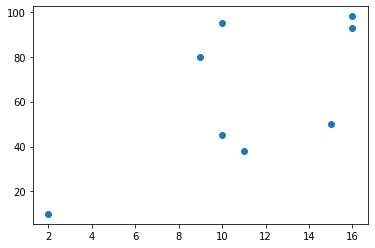

In [26]:
plt.scatter(X_df, Y_df)
plt.show()

In [27]:
lr = LinearRegression()
lr.fit(X_df, Y_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(lr.score(X_df, Y_df))

0.43709481451010035


In [29]:
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient:  [4.58789861]
Intercept:  12.584627964022907


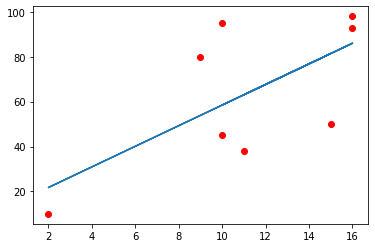

In [30]:
X = np.array(X_df)
plt.scatter(X_df, Y_df, color='red')
plt.plot(X, lr.coef_ * X + lr.intercept_)
plt.show()

<h2> Problem Statement 5 </h2>
<br>
<h4> Apply Linear Regression technique of machine learning to analyze the Diabetes dataset. Display accuracy of the model. Find the equation of the best fit line for this data. </h4>

In [31]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [32]:
diabetes = datasets.load_diabetes()

X = diabetes.data
Y = diabetes.target

print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [33]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("Score: ", lr.score(X, Y))
print("Coefficient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Score:  0.5177494254132934
Coefficient:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Intercept:  152.1334841628965


In [35]:
cvs = cross_val_score(lr, X, Y, cv = 5)
print(cvs.mean())

0.4823181221114939


In [36]:
print("Equation of Linear line is: y = {:.2f} * x + {:.2f}".format(lr.coef_.mean(), lr.intercept_))

Equation of Linear line is: y = 137.60 * x + 152.13


<h2> Problem Statement 6 </h2>
<br>
<h4> Apply Linear, Ridge, Lasso Regression technique of machine learning to analyze and build the model of the Diabetes dataset. Display and compare the accuracy (Cross-Validation, R2 Score) of all the models. </h4>
<h3>Ridge Regression</h3>
<p>Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.</p>
<p>The cost function for ridge regression:</p>
<p>Min(||Y – X(theta)||^2 + λ||theta||^2)</p>
<p>Lambda is the penalty term. λ given here is denoted by an alpha parameter in the ridge function. So, by changing the values of alpha, we are controlling the penalty term. The higher the values of alpha, the bigger is the penalty and therefore the magnitude of coefficients is reduced.</p>
<ul><li>It shrinks the parameters. Therefore, it is used to prevent multicollinearity</li><li>It reduces the model complexity by coefficient shrinkage</li></ul>
<h3>RidgeCV Regression</h3>
<p>RidgeCV is cross validation method in ridge regression. Ridge Regression is a special case of regression which is normally used in datasets which have multicollinearity.</p>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [38]:
diabetes = load_diabetes()

X = diabetes.data
Y = diabetes.target

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [40]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_cvs = cross_val_score(lr, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", lr_cvs.mean())
Y_pred = lr.predict(np.array(X_test))
lr_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", lr_r2)

Cross Validation Score:  0.525694729112369
R2 Score:  0.33222203269065154


In [41]:
rg = Ridge(alpha = 0.5)
rg.fit(X_train, Y_train)
rg_cvs = cross_val_score(rg, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", rg_cvs.mean())
Y_pred = rg.predict(np.array(X_test))
rg_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", rg_r2)

Cross Validation Score:  0.48310100733608313
R2 Score:  0.35667773997495866


In [42]:
rgcv = RidgeCV(alphas = [0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.5])
rgcv.fit(X_train, Y_train)
rgcv_cvs = cross_val_score(rgcv, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", rgcv_cvs.mean())
Y_pred = rgcv.predict(np.array(X_test))
rgcv_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", rgcv_r2)

Cross Validation Score:  0.5267146663641548
R2 Score:  0.33522546387570296


In [43]:
ls = Lasso(alpha = 0.5)
ls.fit(X_train, Y_train)
ls_cvs = cross_val_score(ls, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", ls_cvs.mean())
Y_pred = ls.predict(np.array(X_test))
ls_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", ls_r2)

Cross Validation Score:  0.4769327104691229
R2 Score:  0.32079705910319434


In [44]:
lscv = LassoCV(alphas = [0.01,0.02,0.04,0.05,0.1,0.2,0.5])
lscv.fit(X_train, Y_train)
lscv_cvs = cross_val_score(lscv, X_train, Y_train, cv = 5)
print("Cross Validation Score: ", lscv_cvs.mean())
Y_pred = lscv.predict(np.array(X_test))
lscv_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", lscv_r2)

Cross Validation Score:  0.5247306383901071
R2 Score:  0.32802141313015243


C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

In [45]:
en = ElasticNet(alpha=0.01, l1_ratio=0.7)
en.fit(X_train, Y_train)
en_cvs = cross_val_score(en, X_train, Y_train, cv = 10)
print("Cross Validation Score: ", en_cvs.mean())
Y_pred = en.predict(np.array(X_test))
en_r2 = r2_score(Y_test, Y_pred)
print("R2 Score: ", en_r2)

Cross Validation Score:  0.4396871460006676
R2 Score:  0.3378721592096908


In [46]:
encv = ElasticNetCV(alphas = [1,0.1,0.01,0.005,0.0025], l1_ratio = [0.7,0.8,0.65,0.85,0.60])
encv.fit(X_train, Y_train)
encv_cvs = cross_val_score(encv, X_train, Y_train, cv = 10)
print("Cross Validation Score: ", encv_cvs.mean())
Y_pred = encv.predict(np.array(X_test))
encv_r2 = r2_score(Y_test, Y_pred)
print("R2 score: ", encv_r2)

C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

Cross Validation Score:  0.5197698933812529
R2 score:  0.34624405304129446


<BarContainer object of 4 artists>

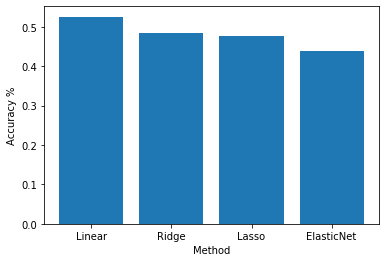

In [47]:
x = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
y = [lr_cvs.mean(), rg_cvs.mean(), ls_cvs.mean(), en_cvs.mean()]

plt.xlabel("Method")
plt.ylabel("Accuracy %")
plt.bar(x, y)

<BarContainer object of 4 artists>

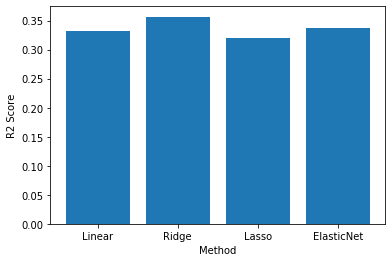

In [48]:
y = [lr_r2, rg_r2, ls_r2, en_r2]

plt.xlabel("Method")
plt.ylabel("R2 Score")
plt.bar(x, y)

<h2> Problem Statement 7 </h2>
<br>
<h4> Apply Decision Tree Classification technique to solve given problem. </h4>
<br>
<p> A dataset collected in a cosmetics shop showing details of customers and whether or not
they responded to a special offer to buy a new lip-stick is shown in table below. Use this
dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks
in the future. Find the root node of decision tree. According to the decision tree you have
made from previous training data set, what is the decision for the test data: [Age < 21,
Income = Low, Gender = Female, Marital Status = Married]? </p>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [50]:
dataset = {
    'Id' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Age' : ['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
    'Income' : ['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
    'Gender' : ['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
    'MaritalStatus' : ['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
    'Buys' : ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

In [51]:
df = pd.DataFrame(dataset)

In [52]:
df

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [53]:
X_df = df.iloc[:, 1:-1]
Y_df = df.iloc[:, -1]

In [54]:
le = LabelEncoder()
X_df = X_df.apply(le.fit_transform)

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_df, Y_df)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
query = ['<21', 'Low', 'Female', 'Married']
query = le.fit_transform(query)
query

array([0, 2, 1, 3], dtype=int64)

In [57]:
pred = dtc.predict([query])
pred[0]

'Yes'

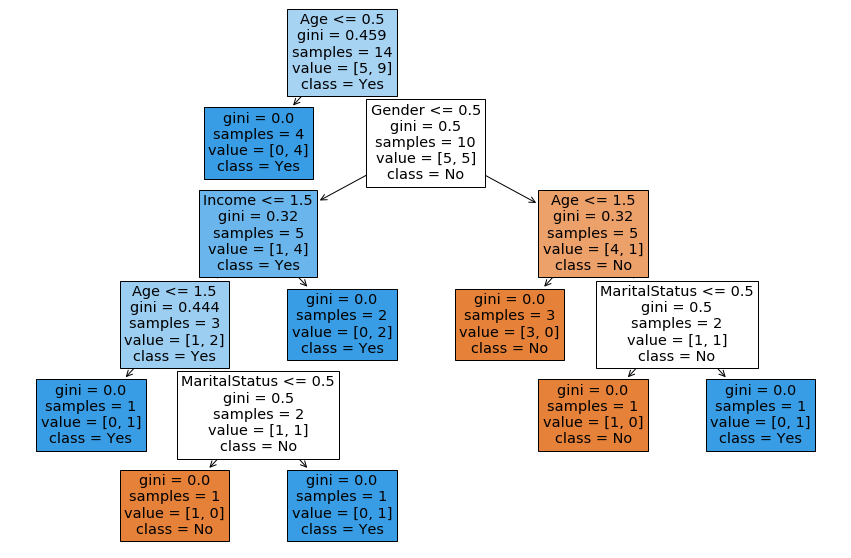

In [58]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dtc, feature_names = X_df.columns, class_names = ["No", "Yes"], filled = True)

<h2> Problem Statement 8 </h2>
<br>
<h4> Apply k-NN Classification technique to solve given problem. </h4>
<br>
<p> In the following diagram let blue circles indicate positive examples and orange squares
indicate negative examples. We want to use k-NN algorithm for classifying the points. If
k=3, find the class of the point (6,6). </p>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [79]:
dataset = np.array([[2, 4, 'negative'], [4, 6, 'negative'], [4, 4, 'positive'], [4, 2, 'negative'], [6, 4, 'negative'], [6, 2, 'positive']])

In [80]:
X = dataset[:, : - 1]
Y = dataset[:, -1]

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

Y_pred_g = knn.predict(X)
print("General KNN: ", Y_pred_g)

X_test = np.array([6, 6])
y_pred = knn.predict([X_test])
print("Prediction for (6, 6): ", y_pred)

General KNN:  ['negative' 'negative' 'negative' 'positive' 'positive' 'negative']
Prediction for (6, 6):  ['negative']


C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

In [82]:
# Accuracy Score

print("Accuracy Score of General KNN: ", accuracy_score(Y, Y_pred_g))


Accuracy Score of General KNN:  0.3333333333333333


In [83]:
# Confusion Matrix

print("Confusion MAtrix for General KNN: ", confusion_matrix(Y,Y_pred_g))


Confusion MAtrix for General KNN:  [[2 2]
 [2 0]]


<h2> Problem Statement 9 </h2>
<br>
<h4> Consider the following training data set. Write a program to construct a decision tree
using ID3 algorithm. Display Accuracy measures for the same and predict a class of
suitable query. </h4>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [85]:
dataset = {
    'Day':['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14'],
    'OutLook':['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'Temperature':['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'Humidity':['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
    'Wind':['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'PlayTennis':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

In [86]:
df = pd.DataFrame(dataset)
df

,Day,OutLook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [87]:
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]

In [88]:
pt_le = LabelEncoder()
X = X.apply(pt_le.fit_transform)

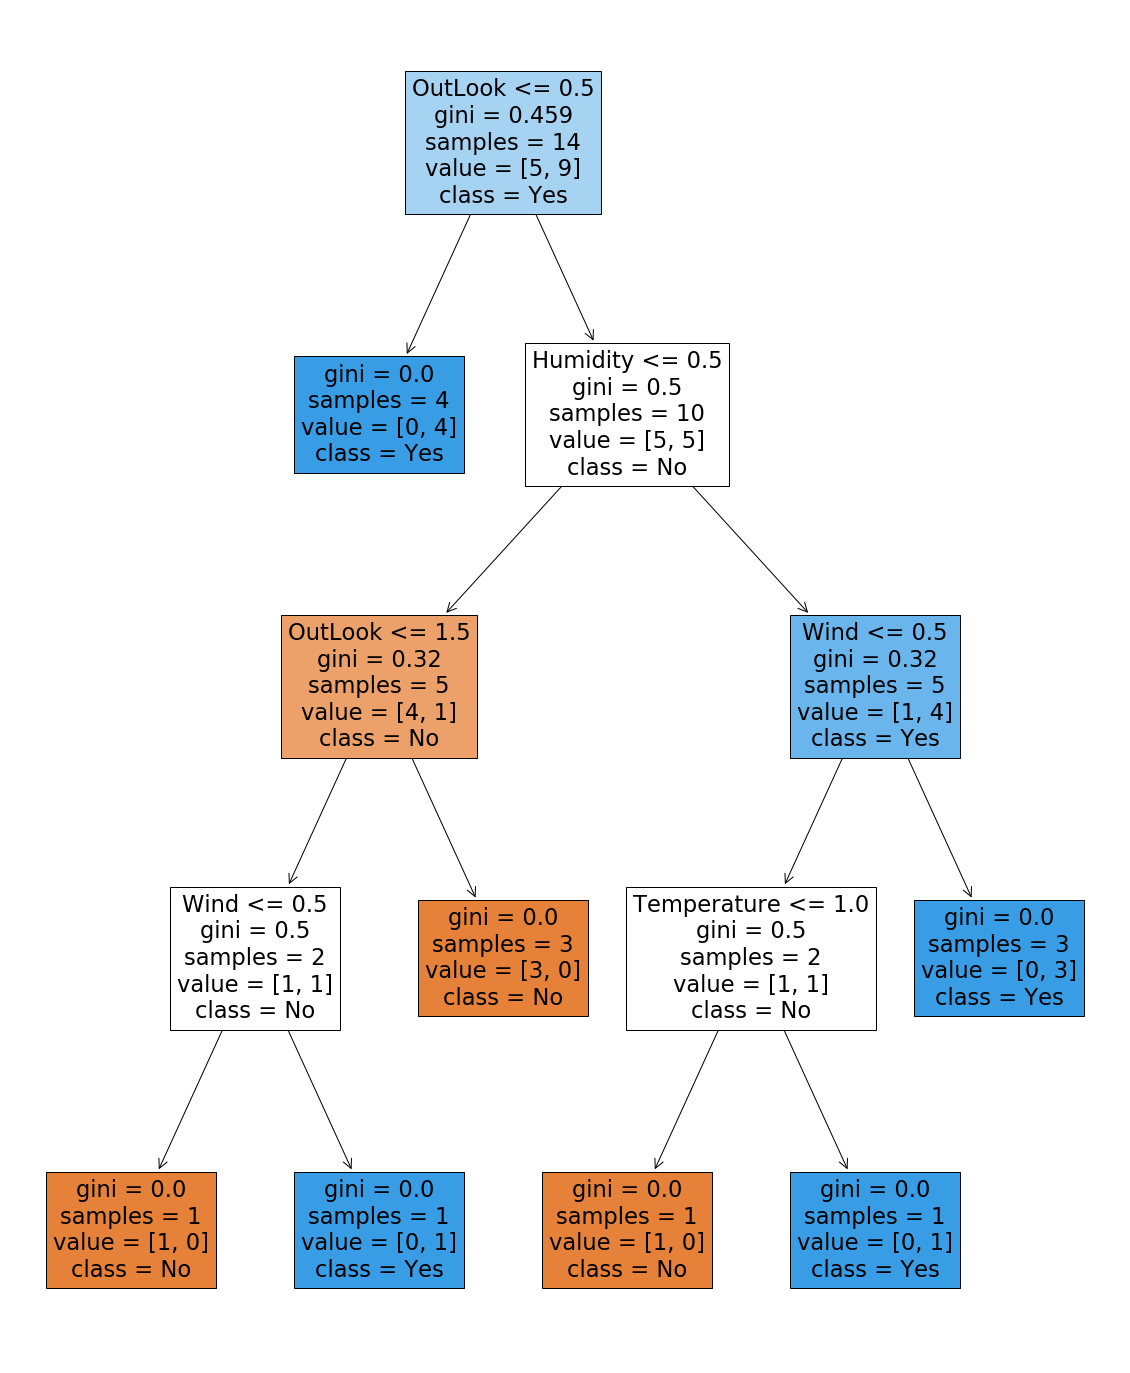

In [89]:
dtc = DecisionTreeClassifier()
dtc.fit(X, Y)

fig = plt.figure(figsize = (20, 25))
_ = tree.plot_tree(dtc, feature_names = X.columns, class_names = ['No', 'Yes'], filled = True)

<h2> Problem Statement 10 </h2>
<br>
<h4> Consider tissue paper factory application. Apply KNN algorithm to find class of new
tissue paper (X1 = 3, X2 = 7). Assume K=3. </h4>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [91]:
data = np.array([[7,7,'B'],[7,4,'B'],[3,4,'G'],[1,4,'G']])
X = data[:, :-1]
Y = data[:, -1]

In [92]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

Y_pred = knn.predict(X)
print("General KNN: ", Y_pred)

y_pred = knn.predict([[3, 7]])
print("Predcition for (3, 7)", y_pred)

General KNN:  ['B' 'B' 'G' 'G']
Predcition for (3, 7) ['G']


C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)
C:\Users\sakur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a

In [94]:
print("Accuracy Score for General KNN: ", accuracy_score(Y, Y_pred))
print("Confusion Matrix for General KNN: ", confusion_matrix(Y, Y_pred))

Accuracy Score for General KNN:  1.0
Confusion Matrix for General KNN:  [[2 0]
 [0 2]]
